In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
# load some useful modules

In [2]:
data = pd.read_csv('C:/Users/yq19555/Desktop/advanced_programming_assessment/puffins.csv')
#load in the data

Initial Data Investigation
============


In [3]:
#investigate your data
data.head()

,body_mass_kg,wing_length_m,beak_length_mm,beak_depth_mm,species
0,4.0,0.2,39.3,19.4,Arctica
1,3.1,0.2,38.6,18.3,Arctica
2,3.7,0.2,40.8,16.7,Arctica
3,4.5,0.2,41.5,17.9,Arctica
4,3.3,0.2,42.3,17.1,Arctica


In [4]:
data.count()

body_mass_kg      341
wing_length_m     341
beak_length_mm    342
beak_depth_mm     342
species           344
dtype: int64

In [5]:
#see how your variables correlate with one another
data.corr()

,body_mass_kg,wing_length_m,beak_length_mm,beak_depth_mm
body_mass_kg,1.000000,NaN,0.596154,-0.472225
wing_length_m,NaN,NaN,NaN,NaN
beak_length_mm,0.596154,NaN,1.000000,-0.237351
beak_depth_mm,-0.472225,NaN,-0.237351,1.000000


<AxesSubplot:>

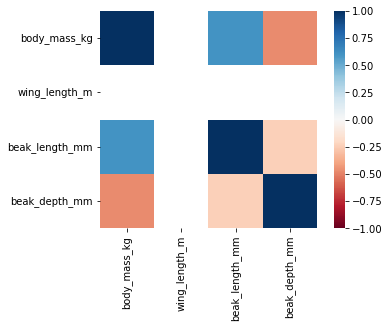

In [6]:
#better visualise the correlation
%matplotlib inline
import seaborn as sns

corr = data.corr()

sns.heatmap(corr , vmin=-1.0, vmax=1.0, square=True, cmap="RdBu")

C:\Users\yq19555\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 0.2 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\yq19555\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical bottom == top == 0.2 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\yq19555\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical left == right == 0.2 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


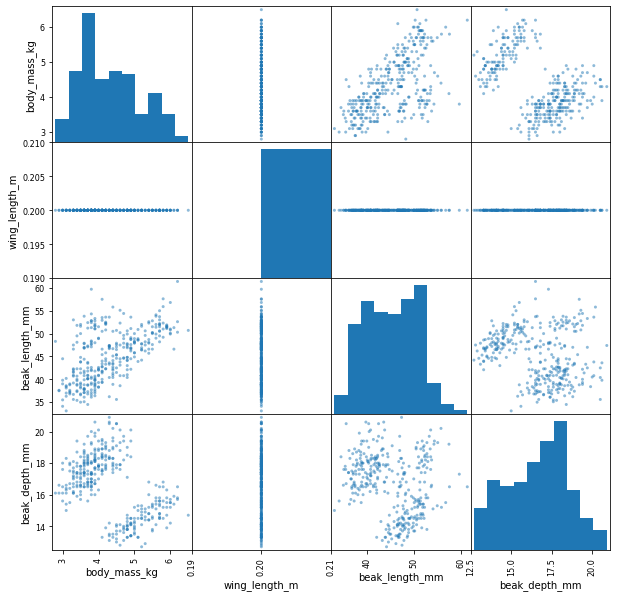

In [7]:
from pandas.plotting import scatter_matrix

a = scatter_matrix(data, figsize=(10, 10))

Data Cleaning
=========

In [8]:
# clearly some issues here. Wing_length_m should be discarded. Every value is 0.2, and so it cannot be used to differentiate the species.
# we should also remove the NA sequences.
clean_data = data.dropna()
clean_data = clean_data.drop(columns=['wing_length_m'])

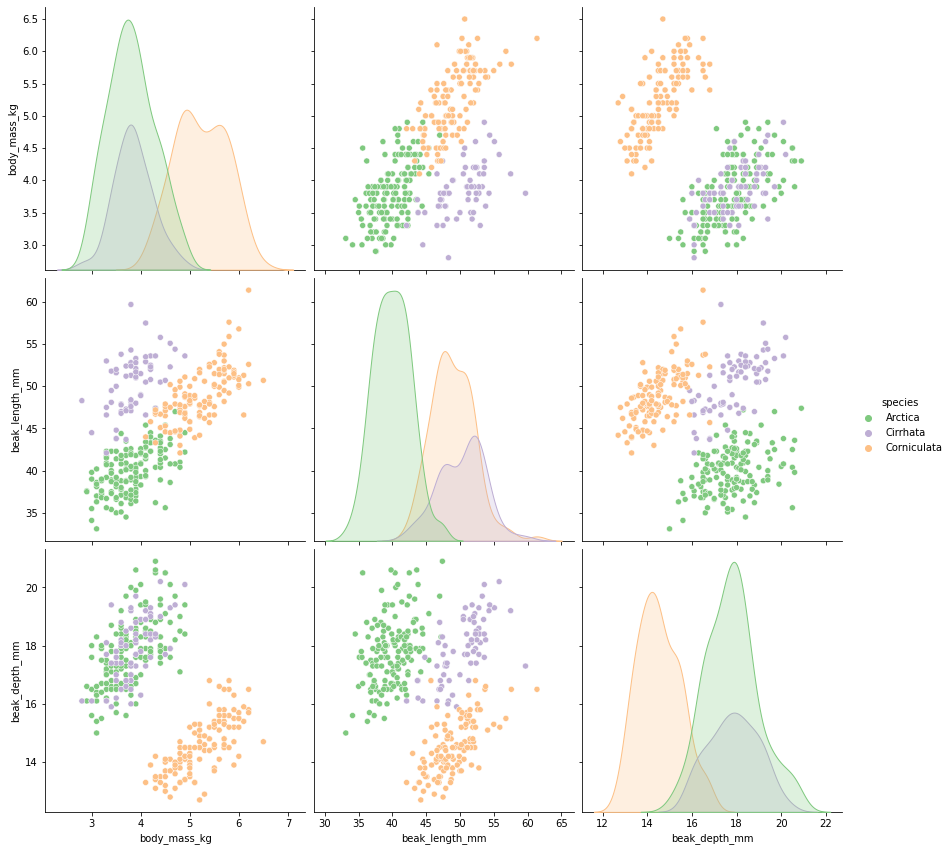

In [9]:
#lets see how these interactions look now, with the data cleaned
%matplotlib inline
sns.set
sns.pairplot(clean_data, hue = "species",  vars = ["body_mass_kg","beak_length_mm","beak_depth_mm"], palette = "Accent", height = 4)

In [10]:
#lets make a species code. this will be easier to work with
#Antarctica = 1
# Cirrhata = 2
# Corniculata = 3
def convert_species(data):
    if data == "Arctica":
        return 1
    elif data == "Cirrhata":
        return 2
    elif data == "Corniculata":
        return 3
    else:
        return data

clean_data["species_code"]= data["species"].apply(convert_species)

Text(0, 0.5, 'beak depth (mm)')

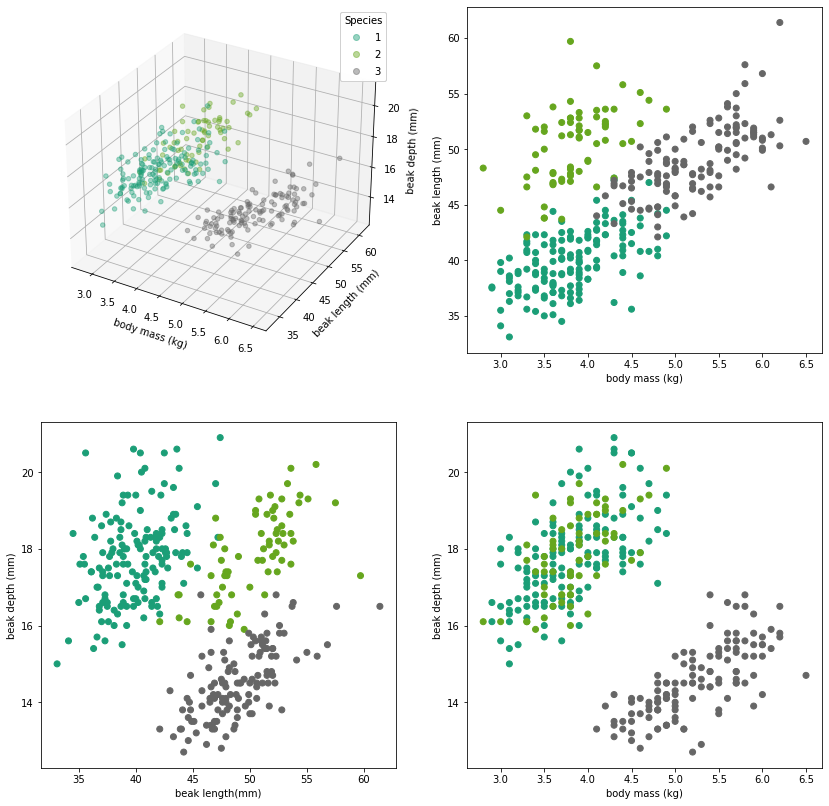

In [11]:
#we need to use three x values. lets see how this may look in 3D
import mpl_toolkits.mplot3d.axes3d
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(221, projection='3d')
alpha=0.4
figure = ax.scatter(clean_data["body_mass_kg"], clean_data['beak_length_mm'], clean_data['beak_depth_mm'], c = clean_data["species_code"], cmap = "Dark2", alpha = alpha)
legend2 = ax.legend(*figure.legend_elements(), title="Species")
figure
ax.add_artist(legend2)
ax.set_xlabel('body mass (kg)')
ax.set_ylabel('beak length (mm)')
ax.set_zlabel('beak depth (mm)')
ax = fig.add_subplot(222)
ax.scatter(clean_data["body_mass_kg"], clean_data['beak_length_mm'],  c = clean_data["species_code"], cmap = "Dark2")
ax.set_xlabel('body mass (kg)')
ax.set_ylabel('beak length (mm)')
ax = fig.add_subplot(223)
ax.scatter( clean_data['beak_length_mm'], clean_data['beak_depth_mm'], c = clean_data["species_code"], cmap = "Dark2")
ax.set_xlabel('beak length(mm)')
ax.set_ylabel('beak depth (mm)')
ax = fig.add_subplot(224)
ax.scatter(clean_data["body_mass_kg"], clean_data['beak_depth_mm'], c = clean_data["species_code"], cmap = "Dark2")
ax.set_xlabel('body mass (kg)')
ax.set_ylabel('beak depth (mm)')

##green(1) is arctica, yellow(2) is Cirrhata, grey(3) is Corniculata

Creating a Model
=====

In [12]:
#split into test and train data
X = pd.DataFrame(clean_data, columns=["body_mass_kg","beak_length_mm", "beak_depth_mm"])
y= (clean_data["species_code"])
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)


In [13]:
## create a model while trying different n_neighbours
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = {
    "n_neighbors" : range(1, 51),
}
model = GridSearchCV(KNeighborsClassifier(), parameters)
model.fit(train_X, train_y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51)})

<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

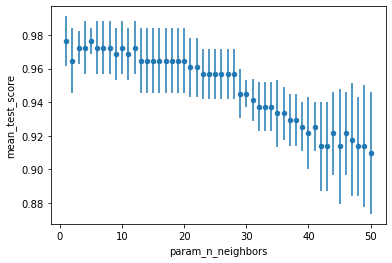

In [14]:
#lets see the resuslts of the parameters. what works best?
cv_results = pd.DataFrame(model.cv_results_)
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score")

In [15]:
#so our best number of neighbours is 5.
#how accutate is or model?
model.score(test_X, test_y)

0.9882352941176471

Principle Componant Analysis
==


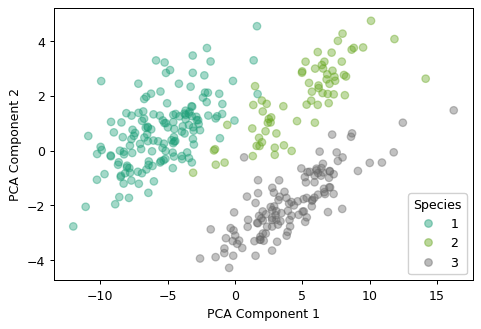

In [16]:
#thats very accurate! but lets check a Principle Componant analysis
import numpy as np
from sklearn.decomposition import PCA
clean_pca_data = clean_data.drop(columns=[ 'species'])
pca = PCA(n_components=2)
view = pca.fit_transform(clean_pca_data)

fig = plt.figure(dpi=90)
ax = fig.add_subplot(111)
pca_fig = ax.scatter(view[:,0], view[:,1], c= y, alpha=alpha, cmap = "Dark2", label = y)
legend1 = ax.legend(*pca_fig.legend_elements(), title="Species")
pca_fig
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.add_artist(legend1)


In [17]:
# we have to create a model that fits the PCA
from sklearn.model_selection import train_test_split

pca_train_X, pca_test_X, pca_train_y, pca_test_y = train_test_split(view, clean_data['species_code'], random_state=42)
parameters = {
    "n_neighbors" : range(1, 51),
}
model_pca = GridSearchCV(KNeighborsClassifier(), parameters)
model_pca.fit(pca_train_X, pca_train_y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51)})

In [18]:
#lets import a function that can visualise our model 
def plot_pca_knn(model, X, y, resolution=100, ax=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    

    if X.shape[1] != 2:
        raise ValueError(f"X must have exactly two features to plot, you passed X.shape={X.shape}")
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    x_prime = pd.DataFrame(x_prime, columns=X.columns)
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)

    if ax is None:
        fig, ax = plt.subplots()
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap="Pastel2", alpha=1.0, shading="auto")
    X.plot.scatter(0, 1, c=y, colormap="Dark2", colorbar=False, alpha=0.8, ax=ax)
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ### added in the x and y lables to make the graphs better visually
   

    

    

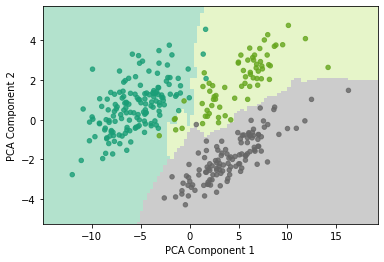

In [19]:
#lets visualise the PCA model, showing the 'species boundries'
plot_pca_knn(model_pca, view, clean_data['species_code'])




In [20]:
#how good is our model
model_pca.score(pca_test_X, pca_test_y)


0.9882352941176471

In [21]:
## brilliant! our non-pca model score is 0.9882352941176471
# our pca model score isalso 0.9882352941176471. So, our PCA worked well.

#but lets test some other classification methods - maybe they will be better suited than KNeighbours


Testing Different Classification Methods
======

In [22]:
#support vector mechanics
from sklearn import svm

clf = svm.SVC()
clf.fit(train_X, train_y)
clf.score(test_X, test_y)


0.9411764705882353

In [23]:
#that score is lower than the KNeighbours classifier. we should disregard SVM as a classicfication method
#lets try NaiveBias
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

y_pred = gnb.fit(train_X, train_y).predict(test_X) 
print("Number of mislabeled points out of a total %d points : %d"
      % (test_X.shape[0], (test_y != y_pred).sum()))



Number of mislabeled points out of a total 85 points : 3


In [24]:
82/85

0.9647058823529412

In [25]:
## not bad but Kneigbours is better
# decision tree classifier
from sklearn import tree
DTC= tree.DecisionTreeClassifier()
DTC = DTC.fit(train_X, train_y)
DTC.score(test_X, test_y)


0.9176470588235294

In [26]:
## the best classification method is clearly KNeighbours, as it has the highest score.

Feature Scaling
==

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [28]:
X_scaled_raw = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_raw, columns=X.columns)

Text(0.5, 0, 'beak depth')

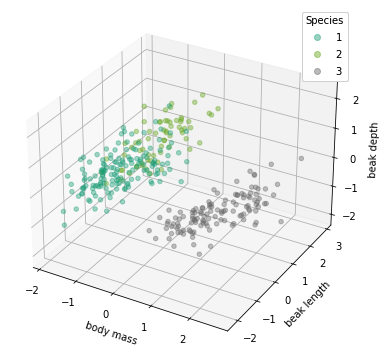

In [29]:
import mpl_toolkits.mplot3d.axes3d
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(221, projection='3d')
alpha=0.4
figure = ax.scatter(X_scaled["body_mass_kg"], X_scaled['beak_length_mm'], X_scaled['beak_depth_mm'], c = clean_data["species_code"], cmap = "Dark2", alpha = alpha)
legend2 = ax.legend(*figure.legend_elements(), title="Species")
figure
ax.add_artist(legend2)
ax.set_xlabel('body mass')
ax.set_ylabel('beak length')
ax.set_zlabel('beak depth')

Making a Pipeline
=====


In [30]:
#The pipeline is essentially thus:
#Raw data -> data cleaning -> basic visualisation ->feature scaling -> PCA -> KNeighboursClassifier -> visualisation
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


#make pipeline
pca_ss_knn = make_pipeline(
    StandardScaler(),
    PCA(n_components=2),  # PCA with 2 components
    KNeighborsClassifier()
)
pca_ss_knn


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [31]:
## got to clean data and split it
X = pd.DataFrame(clean_data, columns=["body_mass_kg","beak_length_mm", "beak_depth_mm"])
y= (clean_data["species_code"])
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)


In [32]:
#run the data through the pipeline and see its score
pca_ss_knn.fit(train_X, train_y)
pca_ss_knn.score(test_X, test_y)


0.9058823529411765

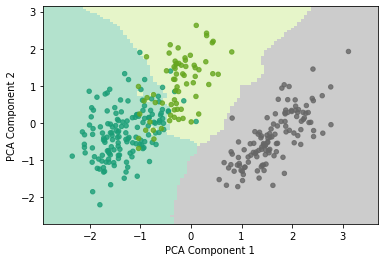

In [33]:
#thats not an amazing score compared to what it used to be before feature scaling
##visualise
transformer_steps = pca_ss_knn[:-1]  
knn_step = pca_ss_knn[-1]  
transformed_X = transformer_steps.transform(X)
plot_pca_knn(knn_step, transformed_X, y)


Number of PCA componants
==


In [34]:
# having two componants has been useful for visualisation, but we may need more componants if we want to create an effective model
pca_ss_knn["pca"].explained_variance_ratio_

array([0.63546586, 0.25352365])

In [36]:
sum(pca_ss_knn["pca"].explained_variance_ratio_)


0.8889895130673573

In [37]:
#check the number of principle componants needed.

new_pca_knn_cv = GridSearchCV(
    make_pipeline(
        StandardScaler(),
        PCA(),
        KNeighborsClassifier()
    ),
    {
        "pca__n_components" : range(1, 4
),
    }
)
new_pca_knn_cv

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'pca__n_components': range(1, 4)})

In [38]:
new_pca_knn_cv.fit(train_X, train_y)
new_pca_knn_cv.score(test_X, test_y)
#better than the two componant pca

1.0

In [39]:
#much better
new_pca_knn_cv.best_estimator_["pca"].n_components_
## so we need three componants 


3

Final Pipeline version
====

In [ ]:
#so, final pipeline:
#data
X = pd.DataFrame(clean_data, columns=["body_mass_kg","beak_length_mm", "beak_depth_mm"])
y= (clean_data["species_code"])
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

#make pipeline
final_pipeline = make_pipeline(
    StandardScaler(),
    PCA(n_components=3),  # PCA with 3 components
    KNeighborsClassifier()
)

#train model and show model score
final_pipeline.fit(train_X, train_y)
final_pipeline.score(test_X, test_y)




I believe my pipeline to be extremely effective.
I have cleaned the data effectively, removing the NA values. I removed the wing_length_m column. Each value was 0.2, and therefore would not affect the model. I also created a function that created a new column of numbers, based upon the species of each bird. This made it easier for me to work with the data.
I have assessed multiple hyperparameters. My first was the number of neighbours in KNeighbours classifier. I did this each time I used the KNeighbours classifier, to ensure that the classifier was generating its highest mean test score. I found that the best number of neighbours to use was 5.
I have also used principal component analysis, which made the relevant linear combinations of the features (i.e. beak length mm against beak depth mm) into new features.
I initially converted the three chosen factors into two features, to better visualise my results. However, I found that the best number of components to use was three.
Feature scaling was also introduced. While it produced a low score with two pca components, it produced a much better score of 1.0 with three.
My model had an excellent score of 0.9882352941176471, using the Kneighbours Classifier.
Other classifiers tested had good scores, but all were less effective fits.
Kneighbours works particularly well, as its non-parametric. This is needed here, as the decision boundary between species in not very regular. However, it is limited in its usefulness.
Its classification can be influenced by irrelevant x values, causing irregularity.
To improve this model, more X values should be added (i.e. age and sex), and more subjects observed to add more datapoints, and therefore improve our model.

